In [ ]:
# Importación de primeras librerías a utilizar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Carga de la Database
data = pd.read_csv('recursos_humanos.csv')
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [ ]:
# Se elimina la columna que no se utilizará pues no es relevante
data.drop(['number_project'], axis=1, inplace=True)
data

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,157,3,0,1,0,sales,low
1,0.80,0.86,262,6,0,1,0,sales,medium
2,0.11,0.88,272,4,0,1,0,sales,medium
3,0.72,0.87,223,5,0,1,0,sales,low
4,0.37,0.52,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,0,1,0,support,low
14995,0.37,0.48,160,3,0,1,0,support,low
14996,0.37,0.53,143,3,0,1,0,support,low
14997,0.11,0.96,280,4,0,1,0,support,low


In [ ]:
# Con get_dummies separamos las variables categoricas en columnas independientes las cuales toman valores booleanos
# Los booleanos False y True tienen valor de 0 y 1 por lo que no es necesario explícitamente convertirlos
df = pd.get_dummies(data, columns=['sales', 'salary'], drop_first=True)
df

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Separación de database en función de las personas que abandonaron o no la empresa
left = df[df.left == 0]
stay = df[df.left == 1]
stay

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,160,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,143,3,0,1,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,280,4,0,1,0,False,False,False,False,False,False,False,True,False,True,False


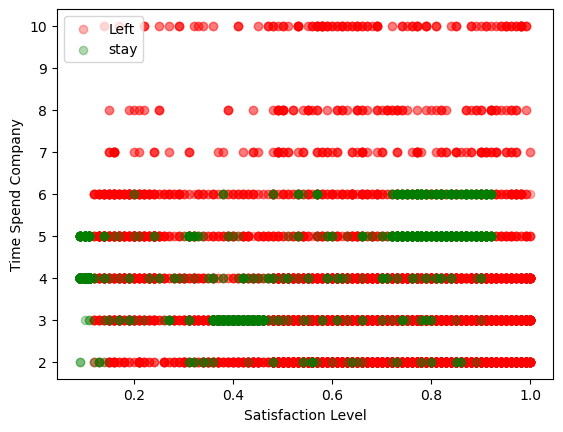

In [ ]:
# Gráfico que compara el Nivel de Satisfacción con el tiempo en la compañia
plt.scatter(left.satisfaction_level, left.time_spend_company, color='red', label='Left',alpha=0.3)
plt.scatter(stay.satisfaction_level, stay.time_spend_company, color='green',label='stay', alpha=0.3)
plt.xlabel('Satisfaction Level')
plt.ylabel('Time Spend Company')
plt.legend()
plt.show()

""" Interpretación:
De 6 para abajo hay cierto equilibrio entre las personas que se fueron y se quedaron.
a partir del 6 vemos que ya no hubo personas que se quedan en la empresa, 
y el nivel de satisfacción tiende a calificaciones altas.
Esto significa que el nivel de satisfacción es bueno, pero el tiempo gastado en la empresa 
sí afectó a la decisión de irse por parte de los empleados. """

In [ ]:
# Comenzamos a separar la data base de la variable a predecir
x_data = df.drop(['left'], axis=1)
x_data

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,151,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14995,0.37,0.48,160,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14996,0.37,0.53,143,3,0,0,False,False,False,False,False,False,False,True,False,True,False
14997,0.11,0.96,280,4,0,0,False,False,False,False,False,False,False,True,False,True,False


In [ ]:
# Caso contrario, separamos la variable a predecir del resto de la database
y = df.left.values
y

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [ ]:
# Normalización devalores para homologarlos
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data))
x

,satisfaction_level,last_evaluation,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.001226,0.001710,0.506452,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.003226,0.000000
1,0.002581,0.002774,0.845161,0.019355,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.000000,0.003226
2,0.000355,0.002839,0.877419,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.000000,0.003226
3,0.002323,0.002806,0.719355,0.016129,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.003226,0.000000
4,0.001194,0.001677,0.512903,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.003226,0.000000,0.0,0.003226,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.001290,0.001839,0.487097,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.003226,0.000000
14995,0.001194,0.001548,0.516129,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.003226,0.000000
14996,0.001194,0.001710,0.461290,0.009677,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.003226,0.000000
14997,0.000355,0.003097,0.903226,0.012903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.003226,0.0,0.003226,0.000000


In [ ]:
# Separación de Bases de entrenamiento y prueba
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.30, random_state=1)

In [ ]:
# Importación del modelo KNN que es el que vamos a utilizar
from sklearn.neighbors import KNeighborsClassifier

""" Se realizó una primer prueba para determinar el cuadrado del total de la base
y convertirlo a su numero impar más cercano en caso de ser par.
Posteriormente se introdujo en n_neigbors lo cuál no arrojó resultados favorables """

n = int(round(np.sqrt(x_train.shape[0])))
if n % 2 == 0:
    n += 1

""" Posteriormente se realizó un array del 1 al 20 y un algoritmo que
iteraba este array asignando sus valores a n_neighbor, para después
evaluar el score. """
n_list = np.arange(1,21)

for i in n_list:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    print(f'n_neighbor: {i} -> Score: {knn.score(x_test, y_test)}')

n_neighbor: 1 -> Score: 0.9144444444444444
n_neighbor: 2 -> Score: 0.9091111111111111
n_neighbor: 3 -> Score: 0.8971111111111111
n_neighbor: 4 -> Score: 0.8982222222222223
n_neighbor: 5 -> Score: 0.8922222222222222
n_neighbor: 6 -> Score: 0.8988888888888888
n_neighbor: 7 -> Score: 0.892
n_neighbor: 8 -> Score: 0.8997777777777778
n_neighbor: 9 -> Score: 0.9015555555555556
n_neighbor: 10 -> Score: 0.9017777777777778
n_neighbor: 11 -> Score: 0.8971111111111111
n_neighbor: 12 -> Score: 0.8984444444444445
n_neighbor: 13 -> Score: 0.8995555555555556
n_neighbor: 14 -> Score: 0.9037777777777778
n_neighbor: 15 -> Score: 0.8993333333333333
n_neighbor: 16 -> Score: 0.9026666666666666
n_neighbor: 17 -> Score: 0.8995555555555556
n_neighbor: 18 -> Score: 0.9002222222222223
n_neighbor: 19 -> Score: 0.8968888888888888
n_neighbor: 20 -> Score: 0.8982222222222223


In [ ]:
""" Dados los resultados, ya que el score no es el más óptimo 
para evaluar la eficiencia del Modelo, a partir de aquí hice pruebas 
con los 3 mejores resultados que fueron el 1, el 2 y el 14,
siendo el 14 el que arrojó mejores resultados en las pruebas que veremos
a continuación. """

knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_train, y_train)
print('Score: ', knn.score(x_test, y_test))
y_predict = knn.predict(x_test)
y_true = y_test

Score:  0.9037777777777778


In [ ]:
# Creación de Matriz de confusión
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, y_predict)
cm

array([[3163,  253],
       [ 180,  904]], dtype=int64)

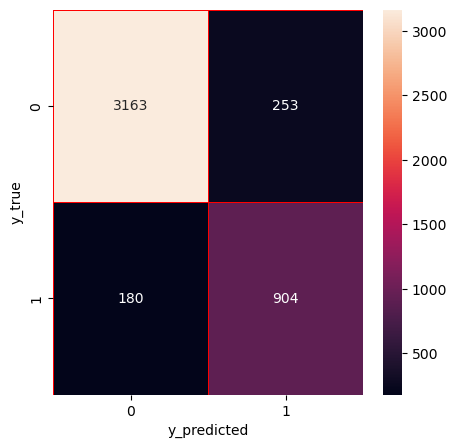

In [ ]:
# Visualización de Matriz de Confusión
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cm, annot=True, linewidths=0.5, linecolor='red', fmt='.0f', ax=ax)
plt.xlabel('y_predicted')
plt.ylabel('y_true')
plt.show()

""" Interpretación:
Tenemos buenos resultados para verdaderos positivos y verdaderos negativos,
siendo estos más que los falsos positivos y negativos.
Parecieran altos valores los falsos positivos y negativos,
pero dada la cantidad de entradas de la database me parecen buenos números. """

In [ ]:
# Precisión de Left y Stay
presicionLeft = cm[0,0] / (cm[0,0] + cm[1,0])
presicionStay = cm[1,1] / (cm[1,1] + cm[0,1])
print('PresicionLeft: ', presicionLeft)
print('PresicionStay: ', presicionStay)

""" En esta prueba los números 1, 2 y 14 oscilaban más o menos
alrededor de los mismos resultados """

PresicionLeft:  0.9461561471731977
PresicionStay:  0.7813310285220397


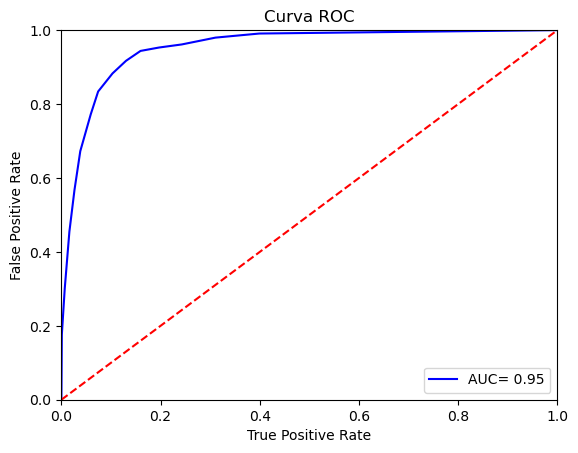

In [ ]:
# Creación y visualización de la curva ROC
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

y_scores = knn.predict_proba(x_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:,1])
roc_auc = auc(fpr, tpr)

plt.title('Curva ROC')
plt.plot(fpr, tpr, 'b', label='AUC= %0.2f' % roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('True Positive Rate')
plt.ylabel('False Positive Rate')
plt.show()

""" Interpretación:
El 14 resultó ser el mejor n_neighbor ya que sí bubo mejor resultado
con diferencia respecto al 1 y 2, el área bajo la curva es de 0.95,
lo que es buen indicio ya que es el que más se acerca a 1, en las pruebas
anteriores los 3 posibles n_neighbors arrojaban más o menos los mismos
resultados, pero aquí fue cuando tuve claro que era el 14 la mejor opción """